In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scipy

A core science library built on numpy - a great resource for lightweight methods for standard data science problems.

Scipy has routines for:
- integration (quadrature)
- clustering
- signal processing (Fourier transformations)
- optimization
- interpolation
- statistics
- more!

We'll just go through a couple example problems to get a sense of what types of problems Scipy can solve.

In [3]:
import scipy

## Scipy.stats

https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats

In [4]:
from scipy import stats

#### Fitting A Distribution to Data

In [5]:
sample = stats.gamma.rvs(a=3., size=1000)

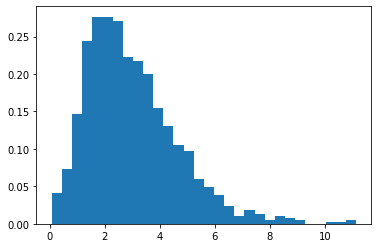

In [6]:
plt.hist(sample, density=True, bins=30)
plt.show();

**Now fit a Gamma to this Data**

In [7]:
a, loc, scale = stats.gamma.fit(sample)

In [8]:
best_fit_gamma = stats.gamma(a=a, loc=loc, scale=scale)
x = np.linspace(0., 15.)
best_fit_pdf = best_fit_gamma.pdf(x)

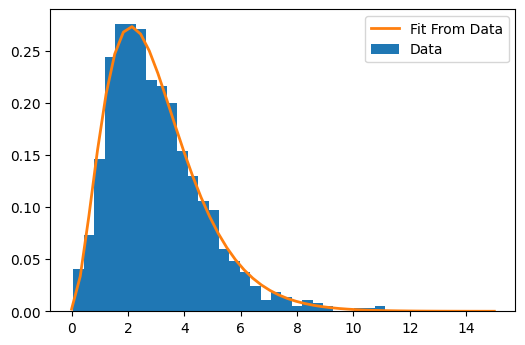

In [9]:
plt.figure(dpi=100)
plt.hist(sample, density=True, bins=30, label="Data")
plt.plot(x, best_fit_pdf, linewidth=2., label='Fit From Data')
plt.legend()
plt.show();

## **Question**

Can you generate 1000 datapoints $x \sim \mathcal{N}(2, 1)$ and fit a log-normal distribution to $\exp(x)$.

In [10]:
sample = stats.norm.rvs(loc=2., size=1000)

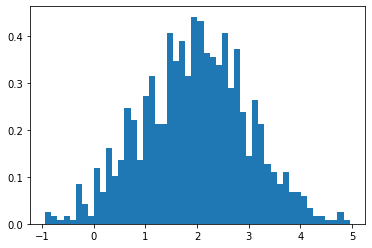

In [11]:
plt.hist(sample, density=True, bins=50);

In [12]:
shape, loc, scale = stats.lognorm.fit(np.exp(sample))

In [13]:
best_fit_dist = stats.lognorm(loc=loc, scale=scale, s=shape)

In [14]:
exp_sample = np.exp(sample)
xs = np.linspace(np.min(exp_sample), np.max(exp_sample))
best_fit_pdf = best_fit_dist.pdf(xs)

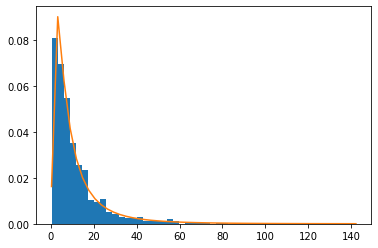

In [15]:
plt.hist(exp_sample, density=True, bins=50);
plt.plot(xs, best_fit_pdf)

## Optimizers

Scipy has a suite of optimizes that can be used to solve minimization and root finding problems

In [16]:
from scipy import optimize

#### Minimization
Let's just make some silly function that we want to minimize: $\textrm{argmin}f(x)$

In [17]:
def fun(x):
    return 2*x**2 + np.sin(4*x)

In [18]:
x = np.linspace(-2, 2)
y = fun(x)

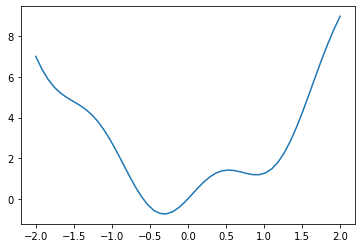

In [19]:
plt.plot(x, y)

**Now Minimize**

In [20]:
x0 = -1. ## our initial guess

In [21]:
output = optimize.minimize(fun, x0, options={"return_all":True})
print(output)

  allvecs: [array([-1.]), array([0.01]), array([-0.3727833]), array([-0.28660905]), array([-0.31238486]), array([-0.31309927]), array([-0.31308831])]
      fun: -0.753675440536379
 hess_inv: array([[0.0521142]])
      jac: array([8.19563866e-08])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([-0.31308831])


In [22]:
fun_steps = fun(np.array(output['allvecs']))
t = np.arange(fun_steps.shape[0])

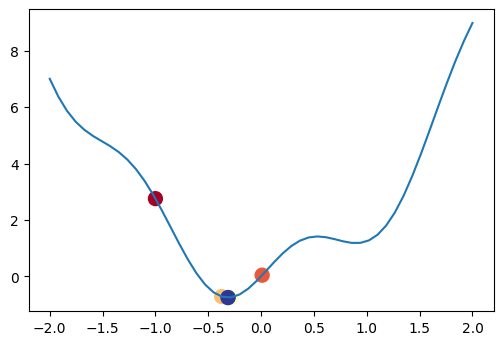

In [23]:
plt.figure(dpi=100)
plt.plot(x, y)
plt.scatter(np.array(output['allvecs']), fun_steps, c=t,
           cmap='RdYlBu', label="Evaluations", s=100)
plt.show();

#### Root Finding

Some silly function we want to solve $f(x) = 0$ for $x$.

In [24]:
def fun(x):
    return x**3 + np.cos(4*x) + 1

In [25]:
x = np.linspace(-2, 2)
y = fun(x)

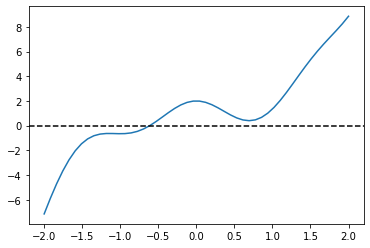

In [26]:
plt.plot(x, y);
plt.axhline(0, color='k', linestyle='--')

**Now Rootfind**

In [27]:
x0 = 1.5 ## initial guess
output = optimize.root_scalar(fun, x0=x0, bracket=[-2., 2.], method='bisect')

In [28]:
print(output)

      converged: True
           flag: 'converged'
 function_calls: 43
     iterations: 41
           root: -0.6124960677279887


In [29]:
f_root = fun(output.root)
print(f_root)

9.758860386455126e-13


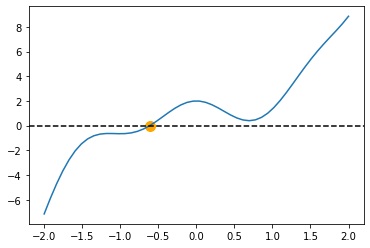

In [30]:
plt.plot(x, y);
plt.scatter(output.root, f_root, c='orange', s=100)
plt.axhline(0, color='k', linestyle='--')


## Regression

Scipy has lightweight implementations of basic regression algorithms: linear, polynomial, multiple

In [31]:
nx = 20
x = np.random.rand(nx) * 10
y = 2 * x + 3 + np.random.randn(nx)*3.

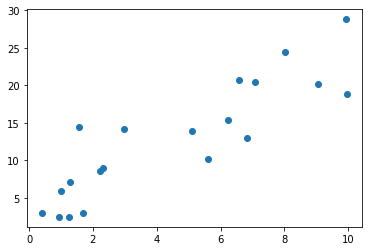

In [32]:
plt.scatter(x, y)
plt.show();

Now just call `stats.linregress`

In [33]:
output = stats.linregress(x, y)
print(output)

LinregressResult(slope=2.080002389353223, intercept=3.4164282302123627, rvalue=0.8784124127405454, pvalue=3.5194192812307475e-07, stderr=0.26672837075093725)


In [34]:
xs = np.linspace(0, 10)
y_pred = output.slope * xs + output.intercept

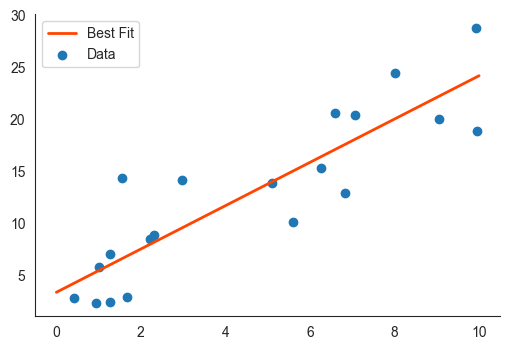

In [35]:
plt.figure(dpi=100)
sns.set_style("white")
plt.scatter(x, y, label="Data")
plt.plot(xs, y_pred, color='OrangeRed', linewidth=2., label="Best Fit")
plt.legend()
sns.despine()
plt.show();

## Interpolation

Basic interpolating functions are included in Scipy - really useful as a quick approximation!

#### 1-D interpolation

In [36]:
train_x = np.linspace(0, 10, 10)
train_y = np.cos(train_x)

test_x = np.linspace(0, 10, 500)

Text(0.5, 1.0, 'Just Some Datapoints')

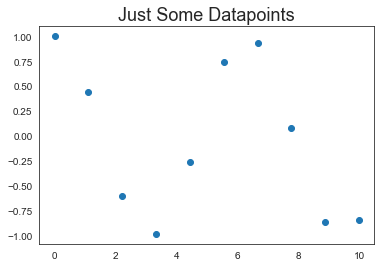

In [37]:
plt.scatter(train_x, train_y)
plt.title("Just Some Datapoints", fontsize=18)

The methods in the `scipy.interpolate` module return _functions_ that can be used to evaluate an interpolating function at new points:

In [38]:
interp = scipy.interpolate.interp1d(train_x, train_y)

In [39]:
pred_y = interp(test_x)

Text(0.5, 1.0, 'Just Some Datapoints')

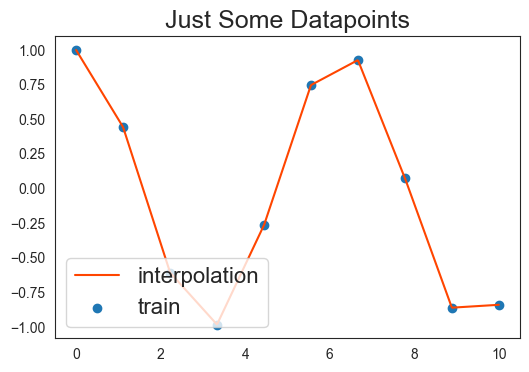

In [40]:
plt.figure(dpi=100)
plt.scatter(train_x, train_y, label='train')
plt.plot(test_x, pred_y, label='interpolation',
        color='orangered')
plt.legend(fontsize=16, loc='lower left')
plt.title("Just Some Datapoints", fontsize=18)

But there are a lot of ways we can interpolate! Let's try something more interesting

In [41]:
interp = scipy.interpolate.interp1d(train_x, train_y, kind='cubic')
pred_y = interp(test_x)

Text(0.5, 1.0, "That's a good fit!")

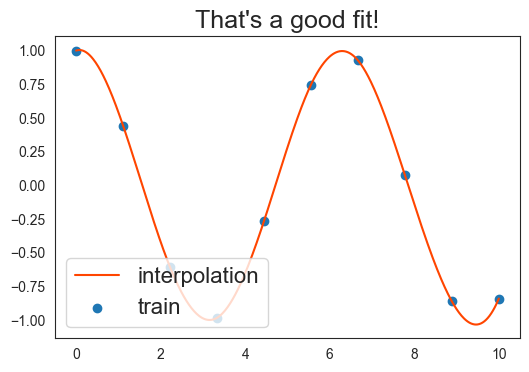

In [42]:
plt.figure(dpi=100)
plt.scatter(train_x, train_y, label='train')
plt.plot(test_x, pred_y, label='interpolation',
        color='orangered')
plt.legend(fontsize=16, loc='lower left')
plt.title("That's a good fit!", fontsize=18)

Text(0.5, 1.0, "That's a good fit!")

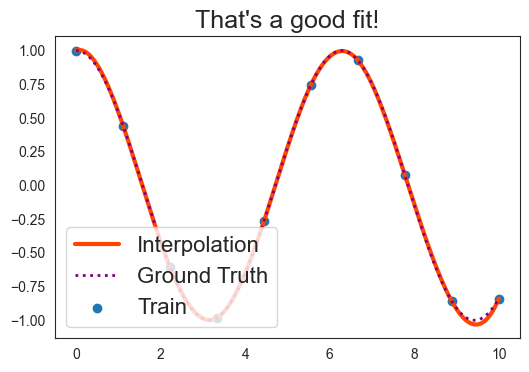

In [43]:
plt.figure(dpi=100)
plt.scatter(train_x, train_y, label='Train')
plt.plot(test_x, pred_y, label='Interpolation',
        color='orangered', linewidth=3.)
plt.plot(test_x, np.cos(test_x), label='Ground Truth',
        color='purple', linestyle=":", linewidth=2.)
plt.legend(fontsize=16, loc='lower left')
plt.title("That's a good fit!", fontsize=18)

## A Cool Last Example

First, we'll need 3D plotting

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

Now we can make some random data

In [121]:
max_ = 3.
x = np.random.rand(20) * max_
y = np.random.rand(20) * max_

z = 3 * np.cos(2*x) + 5*np.cos(y)

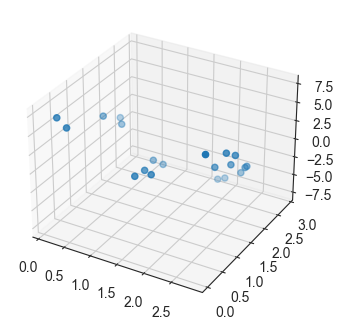

In [122]:
fig = plt.figure(dpi=100)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z)

Now we need a `meshgrid`

In [123]:
test_x = np.linspace(0, max_)
test_y = np.linspace(0, max_)

mesh_x, mesh_y = np.meshgrid(test_x, test_y)

In [148]:
print(mesh_x.shape)
print("\n")
print(mesh_x[:5, :5])
print("\n")
print(mesh_y[:5, :5])

(50, 50)


[[0.         0.06122449 0.12244898 0.18367347 0.24489796]
 [0.         0.06122449 0.12244898 0.18367347 0.24489796]
 [0.         0.06122449 0.12244898 0.18367347 0.24489796]
 [0.         0.06122449 0.12244898 0.18367347 0.24489796]
 [0.         0.06122449 0.12244898 0.18367347 0.24489796]]


[[0.         0.         0.         0.         0.        ]
 [0.06122449 0.06122449 0.06122449 0.06122449 0.06122449]
 [0.12244898 0.12244898 0.12244898 0.12244898 0.12244898]
 [0.18367347 0.18367347 0.18367347 0.18367347 0.18367347]
 [0.24489796 0.24489796 0.24489796 0.24489796 0.24489796]]


Set up our interpolation function same as before

In [149]:
interper = scipy.interpolate.interp2d(x, y, z, kind='cubic')

In [150]:
pred_z = interper(test_x, test_y)

This is where the `meshgrid` comes into play

In [152]:
print(pred_z.shape)

(50, 50)


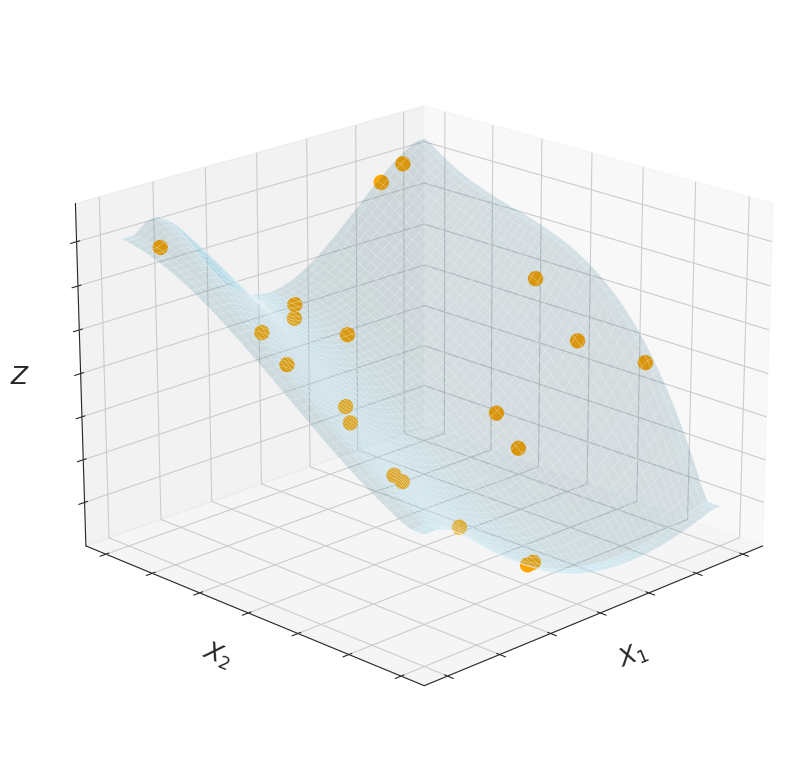

In [154]:
sns.set_style("white")
fs = 18

fig = plt.figure(dpi=100, figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, color='Orange', s=100, alpha=1.)
ax.plot_surface(mesh_x, mesh_y, pred_z, alpha=0.15, color='deepskyblue',
               linewidth=0.1)
ax.view_init(elev=20., azim=45)
ax.set_xlabel(r"$X_1$", fontsize=fs)
ax.set_ylabel(r"$X_2$", fontsize=fs)
ax.set_zlabel(r"$Z$", fontsize=fs)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
plt.show()